<a href="https://colab.research.google.com/github/burjoawl/Burrs_Portofolio/blob/main/TDS%20Landfill/TDS_Landfill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Query di BigQuery:
```
SELECT
  report_date,
  load_time,
  load_type,
  load_weight,
  dropoff_site
FROM
  bigquery-public-data.austin_waste.waste_and_diversion
WHERE
  report_date BETWEEN '2021-01-1' AND '2021-07-9'
```






# Pustaka

## Mengimport library yang dibutuhkan untuk pengerjaan

Memasukkan library yang akan digunakan seperti pandas dan numpy

In [59]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

## Data Loading

Proses memuat data dan mempercantik data yang akan digunakan agar lebih memudahkan dan mudah dipahami

### Memasukkan data csv dan menyimpannya sebagai DataFrame

Memuat data csv dan menjadikannya sebagai DataFrame yang disingkat menjadi df agar lebih singkat untuk proses pengetikan codingnya, dan memperlihatkan data 5 teratas dan 5 terbawah

In [60]:
df = pd.read_csv ('https://raw.githubusercontent.com/burjoawl/Burrs_Portofolio/main/TDS%20Landfill/TDS_Landfill.csv')

print ('Menampilkan 5 data teratas: \n', df.head(5))
print ('')
print ('Menampilkan 5 data terbawah: \n', df.tail(5))

Menampilkan 5 data teratas: 
   report_date                load_time load_type  load_weight dropoff_site
0  2021-07-08  2021-07-08 12:00:00 UTC     TIRES       2260.0          MRF
1  2021-07-08  2021-07-08 11:00:00 UTC     TIRES       1260.0          MRF
2  2021-07-08  2021-07-08 03:00:00 UTC     TIRES        800.0          MRF
3  2021-05-01  2021-05-01 12:29:00 UTC     TIRES        760.0          MRF
4  2021-07-03  2021-07-03 12:09:00 UTC     TIRES       1400.0          MRF

Menampilkan 5 data terbawah: 
       report_date                load_time       load_type  load_weight  \
26152  2021-03-01  2021-03-01 11:26:00 UTC        ORGANICS      12100.0   
26153  2021-03-01  2021-03-01 04:27:00 UTC        ORGANICS      10900.0   
26154  2021-03-01  2021-03-01 05:55:00 UTC        ORGANICS      21800.0   
26155  2021-03-01  2021-03-02 01:10:00 UTC        ORGANICS       5640.0   
26156  2021-03-01  2021-03-01 10:22:00 UTC  RECYCLED METAL        360.0   

                dropoff_site  
26152 

### Melihat informasi tipe data

Pada tabel yang ada, hanya pada kolom `load_weight` yang bertipe *float64*, sedangkan yang lainnya bertipe *object*.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


### Mengecek jumlah data kosong

Meliat jumlah data kosong pada setiap kolom, terdapat kolom kosong pada kolom `load_weight` yang berjumlah 1048 baris

In [62]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

### Mengisi data yang kosong

Mengisi data yang kosong dengan menggunakan median dari nilai kolom yang kosong Disini kolom yang kosong adalah kolom `load_weight`, dan mengisinya menggunakan nilai median

In [63]:
Nilai_Median_Load_Weight = df['load_weight'].median()
print ('Nilai median kolom "load weight" adalah: ', Nilai_Median_Load_Weight)

df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())

Nilai median kolom "load weight" adalah:  11300.0


### Mengecek jumlah data kosong setelah pengisian

Mengecek jumlah data kolom kosong setelah pengisian, terlihat sudah tidak ada kolom yang kosong

In [64]:
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

### Merubah nama kolom

Merubah nama kolom agar lebih sederhana dan mudah dipahami

In [65]:
df.rename(columns={'report_date': 'Tanggal Laporan', 'load_time' : 'Waktu Memuat', 'load_type': 'Tipe Muatan', 'load_weight': 'Beban Muatan', 'dropoff_site':'Lokasi Pembuangan'}, inplace=True)
df

,Tanggal Laporan,Waktu Memuat,Tipe Muatan,Beban Muatan,Lokasi Pembuangan
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


## Eksplorasi Data

### Mengecek rentang waktu

Diurutkan waktu pada `Tanggal Laporan` dari awal sampai akhir, terlihat rentang waktu dari tanggal **1 Januari 2021** sampai tanggal **9 Juli 2021**

In [66]:
df.sort_values(by=['Tanggal Laporan', 'Waktu Memuat'], ascending = True, inplace = True)
df

,Tanggal Laporan,Waktu Memuat,Tipe Muatan,Beban Muatan,Lokasi Pembuangan
123,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
124,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
125,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
126,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
19139,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
148,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
608,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
609,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL
220,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND


### Mengecek macam macam tipe muatan

Terlihat ada 14 `Tipe Muatan` yang terdapat pada data

In [67]:
Jumlah_Tipe_Muatan = df["Tipe Muatan"].nunique()
print ('Tipe muatan terdapat ', Jumlah_Tipe_Muatan, 'buah')

Macam_Tipe_Muatan = df['Tipe Muatan'].unique()
print ('Yaitu: ', Macam_Tipe_Muatan)

Tipe muatan terdapat  14 buah
Yaitu:  ['SWEEPING' 'YARD TRIMMING' 'GARBAGE COLLECTIONS'
 'RECYCLING - SINGLE STREAM' 'ORGANICS' 'BULK' 'DEAD ANIMAL'
 'MIXED LITTER' 'TIRES' 'BRUSH' 'RECYCLED METAL' 'LITTER'
 'CONTAMINATED RECYCLING' 'CONTAMINATED ORGANICS']


### Mengecek macam lokasi pembuangan

Terdapat 18 macam `Lokasi Pembuangan` yang tedapat pada data

In [68]:
Jumlah_Lokasi_Pembuangan = df["Lokasi Pembuangan"].nunique()
print ('Lokasi pembuangan terdapat ', Jumlah_Lokasi_Pembuangan, 'buah')

Macam_Lokasi_Pembuangan = df['Lokasi Pembuangan'].unique()
print ('Yaitu: ', Macam_Lokasi_Pembuangan)

Lokasi pembuangan terdapat  18 buah
Yaitu:  ['ONION CREEK' 'HORNSBY BEND' 'TDS LANDFILL' 'BALCONES RECYCLING'
 'ORGANICS BY GOSH' 'TDS - MRF' 'MRF' 'AUSTIN IRON AND METAL'
 'PARK CENTER' 'ON ROUTE HIGH DUMP' 'WILCAB' 'GREAT NORTHERN'
 'AUSTIN WOOD RECYCLING' 'PARK BEND' 'BALCONES WOODS' 'STEINER LANDFILL'
 'WESTFIELD' 'ST. EDWARDS']


### Mengecek laporan muatan pada pembuangan di tiap lokasi setiap harinya

Terlihat pada tanggal **1 Januari 2021**, hanya ada pembuangan di lokasi `Onion Creek` yang berjumlah 4 muatan dan seterusnya

In [69]:
df.groupby(["Tanggal Laporan", "Lokasi Pembuangan"])["Tipe Muatan"].count()

Tanggal Laporan  Lokasi Pembuangan 
2021-01-01       ONION CREEK            4
2021-01-02       BALCONES RECYCLING    53
                 HORNSBY BEND           5
                 MRF                    2
                 ONION CREEK            3
                                       ..
2021-07-08       ORGANICS BY GOSH      30
                 TDS LANDFILL          65
2021-07-09       HORNSBY BEND          19
                 ONION CREEK            5
                 TDS LANDFILL           2
Name: Tipe Muatan, Length: 1043, dtype: int64

## Central Tendency

Mencari nilai Central Tendency yaitu **Mean**, **Median**, dan **Modus** pada setiap `Lokasi Pembuangan`

### Mean



Dibuatkan rata-rata beban muatan pada setiap lokasi pembuangan, terlihat beban muatan rata-rata yang terbesar ada di lokasi pembuangan `Westfield`, tetapi setelah dilihat lebih lanjut, data `Westfield` hanya berisi angka median yang terisi saat pengisian data kosong

Dibuat 2 angka dibelakang koma agar lebih enak dilihat

In [70]:
Mean_Pembuangan = df.groupby('Lokasi Pembuangan')['Beban Muatan'].mean().round(decimals=2).sort_values(ascending = False)

print ('Rata - rata pada setiap', Mean_Pembuangan)

Rata - rata pada setiap Lokasi Pembuangan
WESTFIELD                16020.00
TDS LANDFILL             15168.32
PARK BEND                13385.00
GREAT NORTHERN           11973.14
ORGANICS BY GOSH         11817.22
ON ROUTE HIGH DUMP       11405.93
ST. EDWARDS              11300.00
PARK CENTER              11300.00
WILCAB                   11300.00
ONION CREEK              11300.00
TDS - MRF                 9872.55
BALCONES RECYCLING        9464.65
BALCONES WOODS            8460.00
HORNSBY BEND              6637.11
AUSTIN WOOD RECYCLING     4050.00
MRF                       1799.98
STEINER LANDFILL           780.00
AUSTIN IRON AND METAL      451.20
Name: Beban Muatan, dtype: float64


### Median

Dibuatkan `Median` `Beban Muatan` pada setiap `Lokasi Pembuangan`, terlihat median yang terbesar ada di lokasi pembuangan `Westfield`, tetapi setelah dilihat lebih lanjut, data `Westfield` hanya berisi angka median yang terisi saat pengisian data kosong

In [71]:
Median_Pembuangan = df.groupby('Lokasi Pembuangan')['Beban Muatan'].median().sort_values(ascending = False)

print ('Median pada setiap', Median_Pembuangan)

Median pada setiap Lokasi Pembuangan
WESTFIELD                16020.0
TDS LANDFILL             14920.0
PARK BEND                12330.0
ORGANICS BY GOSH         11900.0
ONION CREEK              11300.0
ST. EDWARDS              11300.0
PARK CENTER              11300.0
WILCAB                   11300.0
ON ROUTE HIGH DUMP       11300.0
GREAT NORTHERN           11300.0
TDS - MRF                10330.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
HORNSBY BEND              6400.0
AUSTIN WOOD RECYCLING     4050.0
MRF                       1360.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      400.0
Name: Beban Muatan, dtype: float64


### Modus

Dibuatkan `Modus` tipe muatan pada setiap `Lokasi Pembuangan`, terlihat `Tipe Muatan` yang mendominasi seperti pada `Austin Iron and Metal` mendominasi tipe muatan `Recycled Metal`

In [72]:
Modus_Pembuangan = df.groupby('Lokasi Pembuangan')['Tipe Muatan'].agg(pd.Series.mode)
print ('Modus pada setiap', Modus_Pembuangan)

Modus pada setiap Lokasi Pembuangan
AUSTIN IRON AND METAL               RECYCLED METAL
AUSTIN WOOD RECYCLING    RECYCLING - SINGLE STREAM
BALCONES RECYCLING       RECYCLING - SINGLE STREAM
BALCONES WOODS           RECYCLING - SINGLE STREAM
GREAT NORTHERN                            SWEEPING
HORNSBY BEND                                 BRUSH
MRF                                          TIRES
ON ROUTE HIGH DUMP                        SWEEPING
ONION CREEK                               SWEEPING
ORGANICS BY GOSH                          ORGANICS
PARK BEND                                 ORGANICS
PARK CENTER                               SWEEPING
ST. EDWARDS                               SWEEPING
STEINER LANDFILL               GARBAGE COLLECTIONS
TDS - MRF                RECYCLING - SINGLE STREAM
TDS LANDFILL                   GARBAGE COLLECTIONS
WESTFIELD                      GARBAGE COLLECTIONS
WILCAB                                    SWEEPING
Name: Tipe Muatan, dtype: object


In [73]:
Modus_Tipe_Pembuangan = df['Tipe Muatan'].mode()
Modus_Tipe_Pembuangan

0    GARBAGE COLLECTIONS
Name: Tipe Muatan, dtype: object

## Pemilihan Lokasi Pembuangan

Sebelum memilih lokasi pembuangan yang akan diteliti lebih lanjut, penulis melihat data-data yang ada pada setiap lokasi pembuangan

In [74]:
Jumlah_Setiap_Lokasi = df.groupby('Lokasi Pembuangan')['Tanggal Laporan'].count().sort_values(ascending = False)
Jumlah_Setiap_Lokasi

Lokasi Pembuangan
TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
ST. EDWARDS                  1
STEINER LANDFILL             1
BALCONES WOODS               1
WESTFIELD                    1
WILCAB                       1
Name: Tanggal Laporan, dtype: int64

Dari 18 macam lokasi pembuangan, penulis memilih lokasi pembuangan `TDS Landfill`, dikarenakan memiliki jumlah data yang banyak dan bervariasi, sehingga kemungkinan memiliki banyak hal yang dieksplorasi.

In [75]:
# Membuat variabel untuk Lokasi Pembuangan TDS LANDFILL

TDSLandfill = df.query("`Lokasi Pembuangan` == 'TDS LANDFILL'")

TDSLandfill

,Tanggal Laporan,Waktu Memuat,Tipe Muatan,Beban Muatan,Lokasi Pembuangan
19152,2021-01-02,2021-01-02 01:02:00 UTC,GARBAGE COLLECTIONS,8420.0,TDS LANDFILL
19158,2021-01-02,2021-01-02 01:05:00 UTC,GARBAGE COLLECTIONS,9860.0,TDS LANDFILL
19166,2021-01-02,2021-01-02 01:18:00 UTC,GARBAGE COLLECTIONS,21440.0,TDS LANDFILL
19147,2021-01-02,2021-01-02 01:19:00 UTC,GARBAGE COLLECTIONS,19300.0,TDS LANDFILL
19179,2021-01-02,2021-01-02 01:29:00 UTC,GARBAGE COLLECTIONS,23840.0,TDS LANDFILL
...,...,...,...,...,...
582,2021-07-08,2021-07-08 12:47:00 UTC,GARBAGE COLLECTIONS,18320.0,TDS LANDFILL
589,2021-07-08,2021-07-08 12:51:00 UTC,GARBAGE COLLECTIONS,22480.0,TDS LANDFILL
584,2021-07-08,2021-07-09 12:00:00 UTC,GARBAGE COLLECTIONS,23060.0,TDS LANDFILL
608,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [76]:
# Melihat data stastik pada TDS Landfill menggunakan describe

print (TDSLandfill.describe().round(decimals=2))

print ('') #Untuk memisah bagian atas dan bawah agar lebih terlihat

# Melihat data stastik pada TDS Landfill menggunakan masing masing fungsi

print ('Jumlah data: ', TDSLandfill['Beban Muatan'].count())
print ('Mean: ', TDSLandfill['Beban Muatan'].mean().round(2))
print ('Standar Deviasi: ', TDSLandfill['Beban Muatan'].std().round(2))
print ('Data Minimal: ', TDSLandfill['Beban Muatan'].min())
print ('25% :', TDSLandfill['Beban Muatan'].quantile(0.25))
print ('50% :', TDSLandfill['Beban Muatan'].quantile(0.5)) # bisa disebut median
print ('75% :', TDSLandfill['Beban Muatan'].quantile(0.75))
print ('Data Maksimal: ', TDSLandfill['Beban Muatan'].max())

       Beban Muatan
count      10694.00
mean       15168.32
std         8590.07
min            0.00
25%         8820.00
50%        14920.00
75%        21660.00
max       245540.00

Jumlah data:  10694
Mean:  15168.32
Standar Deviasi:  8590.07
Data Minimal:  0.0
25% : 8820.0
50% : 14920.0
75% : 21660.0
Data Maksimal:  245540.0


### Outlier

Menggunakan metode `IQR` karena terlihat dari nilai skewness yang lebih dari 1 (3.7) menandakan bahwa distribusi data yang tidak normal, sehingga menggunakan metode `IQR` dan juga menggunakan Extreme Case karena skewness yang tinggi

### IQR

Nilai Skewness : 3.7


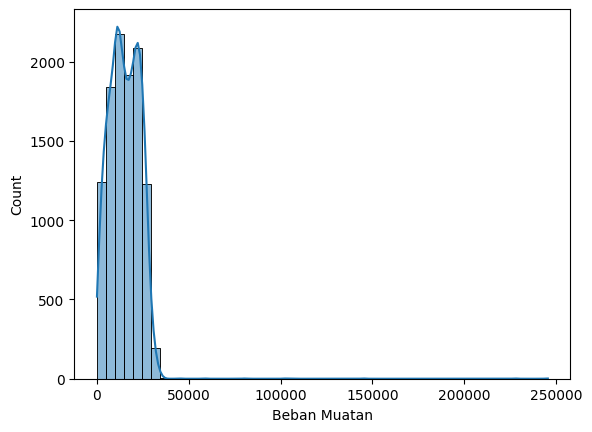

In [77]:
print ('Nilai Skewness :', TDSLandfill['Beban Muatan'].skew().round(decimals=2))

#Menggunakan bins=50 agar lebih terlihat grafiknya, dan perbandingan dengan garis kurva pada fungsi kde=True
sns.histplot(TDSLandfill['Beban Muatan'], bins=50, kde=True);

In [78]:
# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = TDSLandfill['Beban Muatan'].quantile(0.25)
Q3 = TDSLandfill['Beban Muatan'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

Nilai Q1:  8820.0
Nilai Q3:  21660.0
Nilai IQR:  12840.0


In [79]:
# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

Nilai Batas Bawah:  -10440.0
Nilai Batas Atas:  40920.0


In [80]:
# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
df_IQR = TDSLandfill[(TDSLandfill['Beban Muatan'] > BatasBawah) & (TDSLandfill['Beban Muatan'] < BatasAtas)]

# Menampilkan jumlah nilai, terlihat yang hilang terdapat 5 data
print (TDSLandfill.shape) #Nilai sebelum
print (df_IQR.shape) #Nilai setelah

(10694, 5)
(10687, 5)


In [81]:
# Melihat data yang hilang
DataHilang = TDSLandfill[(TDSLandfill['Beban Muatan'] < BatasBawah) | (TDSLandfill['Beban Muatan'] > BatasAtas)]

print (DataHilang)

      Tanggal Laporan             Waktu Memuat          Tipe Muatan  \
19960      2021-01-07  2021-01-07 02:45:00 UTC  GARBAGE COLLECTIONS   
24239      2021-02-09  2021-02-09 01:08:00 UTC  GARBAGE COLLECTIONS   
2381       2021-03-09  2021-03-09 01:30:00 UTC  GARBAGE COLLECTIONS   
5507       2021-03-29  2021-03-29 05:08:00 UTC  GARBAGE COLLECTIONS   
13632      2021-05-26  2021-05-26 11:40:00 UTC  GARBAGE COLLECTIONS   
13817      2021-05-27  2021-05-27 11:33:00 UTC  GARBAGE COLLECTIONS   
16964      2021-06-21  2021-06-21 01:05:00 UTC  GARBAGE COLLECTIONS   

       Beban Muatan Lokasi Pembuangan  
19960       44980.0      TDS LANDFILL  
24239      102680.0      TDS LANDFILL  
2381       145160.0      TDS LANDFILL  
5507        58600.0      TDS LANDFILL  
13632       80697.0      TDS LANDFILL  
13817      245540.0      TDS LANDFILL  
16964      227780.0      TDS LANDFILL  


### Persen hasil membuang outlier

In [82]:
# Menghitung persen yang hilang dari data awal
PersenHilang = (len (TDSLandfill.index) - len(df_IQR.index)) / len (TDSLandfill.index) * 100

print ('Persen yang hilang adalah: ', round(PersenHilang, 4), '%')

Persen yang hilang adalah:  0.0655 %


Nilai Skewness : 0.02


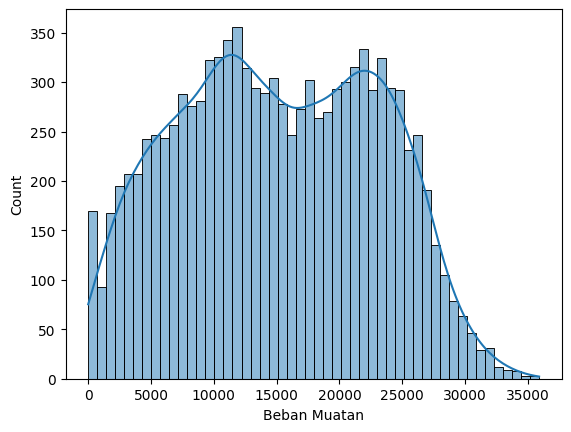

In [83]:
# Mengecek ulang setelah outlier dihilangkan
print ('Nilai Skewness :', df_IQR['Beban Muatan'].skew().round(decimals=2))

sns.histplot(df_IQR['Beban Muatan'], bins=50, kde=True);

Setelah dilakukannya pemilahan outlier, dari nilai awalnya 3.7 menjadi 0.02 yang menghilangkan sebanyak 0.0655%. Dapat dilihat juga grafik outlier pada sebelum dilakukannya pemilahan, condong ke kiri yang tergolong right skewed, setelah dilakukan pemilahan terlihat grafiknya menjadi simetris

### Menghitung `Range`, `Variance`, dan `Standar Deviasi`

Pada Lokasi Pembuangan `TDS Landfill`, terdapat penyebaran data yang luas sehingga datanya heterogen, dari penyebaran data yang luas terlihat juga variasi data yang tinggi, terlihat juga dari data standar deviasi yang lumayan tinggi, sehingga dapat ditarik kesimpulan bahwa pada lokasi pembuangan `TDS Landfill` memiliki keberagaman nilai beban muatan

In [84]:
# Melihat penyebaran data dengan rentang data nilai minimal ke maksimal

data_range = df_IQR['Beban Muatan'].max() - df_IQR['Beban Muatan'].min()
print("Range:", data_range)

Range: 35900.0


In [85]:
# Melihat variasi angka perbandingan dengan nilai rata-rata lalu di average

data_variance = df_IQR['Beban Muatan'].var()
print ("Data Variance: ", data_variance)

Data Variance:  61675925.62144893


In [86]:
# Menghitung nilai standar deviasi yang berisi jauh dekatnya sebaran data dengan nilai rata-rata

data_std = df_IQR['Beban Muatan'].std()
print ("Data Standar Deviasi: ", data_std)

Data Standar Deviasi:  7853.402168579483


### Metode IQR

Pada perhitungan IQR, menggunakan angka 1.5 karena saat menggunakan angka 3 yang termasuk Extreme Case angka skewnesnya lebih sedikit yang 1.5 (0.02) dibandingkan dengan angka 3 (0.04), dan juga pada grafik lebih normal yang angka 1.5

Nilai Q1:  8820.0
Nilai Q3:  21660.0
Nilai IQR:  12840.0
Nilai Batas Bawah:  -29700.0
Nilai Batas Atas:  60180.0
Nilai Skewness : 0.04


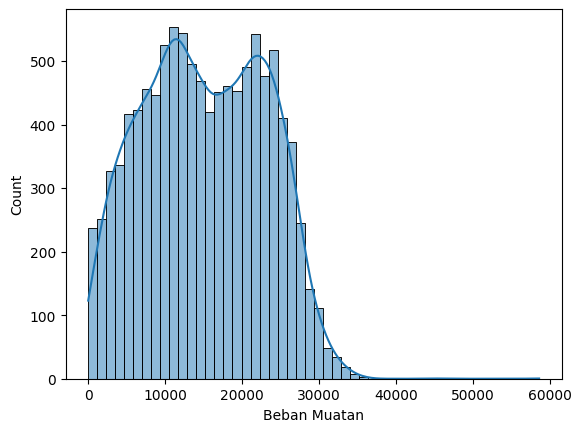

In [87]:
# Angka 3

Q1_3 = TDSLandfill['Beban Muatan'].quantile(0.25)
Q3_3 = TDSLandfill['Beban Muatan'].quantile(0.75)
print ('Nilai Q1: ', Q1_3)
print ('Nilai Q3: ', Q3_3)

IQR_3 = Q3_3 - Q1_3
print ('Nilai IQR: ', IQR_3)

BatasBawah_3 = Q1_3 - (IQR_3 * 3)
BatasAtas_3 = Q3_3 + (IQR_3 * 3)

print ('Nilai Batas Bawah: ', BatasBawah_3)
print ('Nilai Batas Atas: ', BatasAtas_3)

df_IQR_3 = TDSLandfill[(TDSLandfill['Beban Muatan'] > BatasBawah_3) & (TDSLandfill['Beban Muatan'] < BatasAtas_3)]

print ('Nilai Skewness :', df_IQR_3['Beban Muatan'].skew().round(decimals=2))

sns.histplot(df_IQR_3['Beban Muatan'], bins=50, kde=True);

## Confidence Interval

Sebelum menganalisa `Confidence Interval` diperlukan data dengan distribusi normal, sehingga perlu dihilangkan nilai outlier. Dalam pembuatan `Confidence Interval` menggunakan data dari semua lokasi pembuangan karena perlu pertimbangan dari lokasi pembuangan yang ada, dan apabila hanya menggunakan satu lokasi pembuangan, tidak mewakilkan lokasi pembuangan yang ada di kota Austin.

Nilai Skewness : 3.42


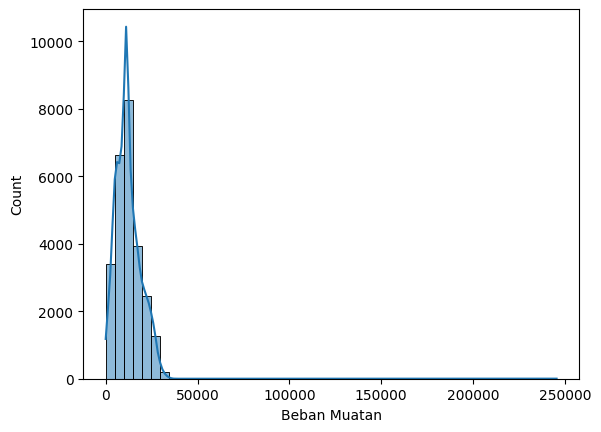

In [88]:
print ('Nilai Skewness :', df['Beban Muatan'].skew().round(decimals=2))

sns.histplot(df['Beban Muatan'], bins=50, kde=True);

Nilai Q1:  8820.0
Nilai Q3:  21660.0
Nilai IQR:  12840.0
Nilai Batas Bawah:  -10440.0
Nilai Batas Atas:  40920.0
Nilai Skewness : 0.58


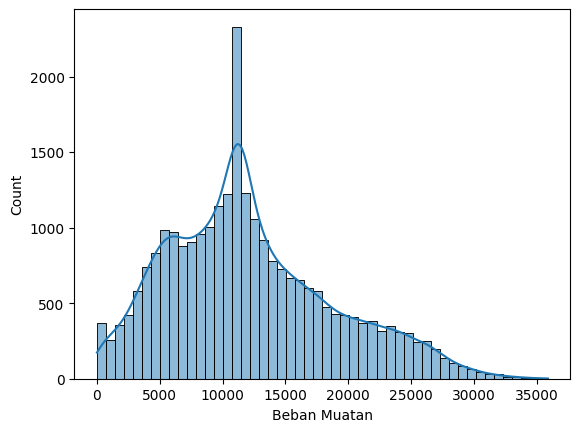

In [89]:
df_Q1 = TDSLandfill['Beban Muatan'].quantile(0.25)
df_Q3 = TDSLandfill['Beban Muatan'].quantile(0.75)
print ('Nilai Q1: ', df_Q1)
print ('Nilai Q3: ', df_Q3)

df_IQR = df_Q3 - df_Q1
print ('Nilai IQR: ', df_IQR)

df_BatasBawah = df_Q1 - (df_IQR * 1.5)
df_BatasAtas = df_Q3 + (df_IQR * 1.5)

print ('Nilai Batas Bawah: ', df_BatasBawah)
print ('Nilai Batas Atas: ', df_BatasAtas)

df_IQR2 = df[(df['Beban Muatan'] > df_BatasBawah) & (df['Beban Muatan'] < df_BatasAtas)]

print ('Nilai Skewness :', df_IQR2['Beban Muatan'].skew().round(decimals=2))

sns.histplot(df_IQR2['Beban Muatan'], bins=50, kde=True);

### ZScore

<ipython-input-90-5c3460548104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR2['zscore'] = (df_IQR2['Beban Muatan'] - df_IQR2['Beban Muatan'].mean()) / (df_IQR2['Beban Muatan'].std())


0.4838174875463272


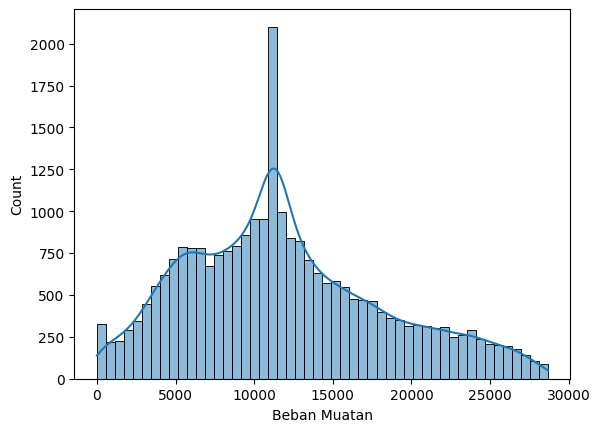

In [90]:
df_IQR2['zscore'] = (df_IQR2['Beban Muatan'] - df_IQR2['Beban Muatan'].mean()) / (df_IQR2['Beban Muatan'].std())

df_IQR2_no_outliers = df_IQR2[(df_IQR2.zscore<2.5) & (df_IQR2.zscore>-2.5)]
print(df_IQR2_no_outliers['Beban Muatan'].skew())

sns.histplot(df_IQR2_no_outliers['Beban Muatan'], bins=50, kde=True);

In [91]:
Jumlah_Lokasi_Pembuangan = df["Lokasi Pembuangan"].nunique()
print ('Lokasi pembuangan sebelum menggunakan outlier ', Jumlah_Lokasi_Pembuangan, 'buah')

Jumlah_Lokasi_Pembuangan2 = df_IQR2_no_outliers["Lokasi Pembuangan"].nunique()
print ('Lokasi pembuangan setelah menggunakan outlier ', Jumlah_Lokasi_Pembuangan2, 'buah')

#Tidak terlihat adanya perbedaan jumlah lokasi pembuangan setelah dibuangnya nilai outlier

Lokasi pembuangan sebelum menggunakan outlier  18 buah
Lokasi pembuangan setelah menggunakan outlier  18 buah


In [92]:
print ('Mean dari Beban Muatan dari semua site setelah dihilangkan nilai outlier :', df_IQR2_no_outliers['Beban Muatan'].mean())
print ('Standar Deviasi dari Beban Muatan dari semua site setelah dihilangkan nilai outlier :', df_IQR2_no_outliers['Beban Muatan'].std())

Mean dari Beban Muatan dari semua site setelah dihilangkan nilai outlier : 11954.12994120331
Standar Deviasi dari Beban Muatan dari semua site setelah dihilangkan nilai outlier : 6358.17852764878


In [93]:
# Confidence Interval
print ('One Tailed Test :',stats.norm.interval (0.9, df_IQR2_no_outliers['Beban Muatan'].mean(), df_IQR2_no_outliers['Beban Muatan'].std()))

# Kenapa menggunakan nilai alpha 0.9, karena apabila menggunakan nilai alpha 0.95, batas bawahnya bernilai minus dimana beban muatan tidak mungkin bernilai minus
print ('Two Tailed Test :', stats.norm.interval (0.95, df_IQR2_no_outliers['Beban Muatan'].mean(), df_IQR2_no_outliers['Beban Muatan'].std()))

One Tailed Test : (1495.856929195239, 22412.40295321138)
Two Tailed Test : (-507.6709802642072, 24415.930862670826)


### Kesimpulan

Berdasarkan hasil `Confidence Interval`, perkiraan kapasitas lokasi pembuangan yang baru adalah dari 1495 sampai 22412.

## Analisa Uji Hipotesis

H0 = Tidak ada perbedaan tipe muatan antara TDS Landfill dan TDS MRF

H1 = Terdapat perbedaan tipe muatan antara TDS Landfill dan TDS MRF

In [94]:
Pembuangan_Perhari = df_IQR2_no_outliers.groupby(['Lokasi Pembuangan', 'Tanggal Laporan'], as_index=False).sum()
Pembuangan_Perhari = Pembuangan_Perhari.drop(columns = 'zscore')

print (Pembuangan_Perhari)

          Lokasi Pembuangan Tanggal Laporan  Beban Muatan
0     AUSTIN IRON AND METAL      2021-01-05         260.0
1     AUSTIN IRON AND METAL      2021-01-06         220.0
2     AUSTIN IRON AND METAL      2021-01-13         640.0
3     AUSTIN IRON AND METAL      2021-01-19         830.0
4     AUSTIN IRON AND METAL      2021-02-04         140.0
...                     ...             ...           ...
1037           TDS LANDFILL      2021-07-07     1036970.0
1038           TDS LANDFILL      2021-07-08     1001740.0
1039           TDS LANDFILL      2021-07-09        4940.0
1040              WESTFIELD      2021-05-20       16020.0
1041                 WILCAB      2021-01-21       11300.0

[1042 rows x 3 columns]


<ipython-input-94-1e4273f8597a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Pembuangan_Perhari = df_IQR2_no_outliers.groupby(['Lokasi Pembuangan', 'Tanggal Laporan'], as_index=False).sum()


In [95]:
Pembuangan_Perhari_Landfill = Pembuangan_Perhari.query('`Lokasi Pembuangan` == "TDS LANDFILL"')
Pembuangan_Perhari_MRF = Pembuangan_Perhari[(Pembuangan_Perhari["Lokasi Pembuangan"] == "TDS - MRF")]

print (Pembuangan_Perhari_Landfill)
print ('')
print (Pembuangan_Perhari_MRF)

     Lokasi Pembuangan Tanggal Laporan  Beban Muatan
879       TDS LANDFILL      2021-01-02      977720.0
880       TDS LANDFILL      2021-01-04     1681060.0
881       TDS LANDFILL      2021-01-05     1193020.0
882       TDS LANDFILL      2021-01-06     1166640.0
883       TDS LANDFILL      2021-01-07     1129000.0
...                ...             ...           ...
1035      TDS LANDFILL      2021-07-05     1169060.0
1036      TDS LANDFILL      2021-07-06     1130180.0
1037      TDS LANDFILL      2021-07-07     1036970.0
1038      TDS LANDFILL      2021-07-08     1001740.0
1039      TDS LANDFILL      2021-07-09        4940.0

[161 rows x 3 columns]

    Lokasi Pembuangan Tanggal Laporan  Beban Muatan
773         TDS - MRF      2021-01-02         840.0
774         TDS - MRF      2021-01-04      559720.0
775         TDS - MRF      2021-01-05      619260.0
776         TDS - MRF      2021-01-06       23020.0
777         TDS - MRF      2021-01-07         380.0
..                ...      

In [96]:
Landfill_MRF = pd.merge(Pembuangan_Perhari_Landfill, Pembuangan_Perhari_MRF, on = ['Tanggal Laporan'])
Landfill_MRF

,Lokasi Pembuangan_x,Tanggal Laporan,Beban Muatan_x,Lokasi Pembuangan_y,Beban Muatan_y
0,TDS LANDFILL,2021-01-02,977720.0,TDS - MRF,840.0
1,TDS LANDFILL,2021-01-04,1681060.0,TDS - MRF,559720.0
2,TDS LANDFILL,2021-01-05,1193020.0,TDS - MRF,619260.0
3,TDS LANDFILL,2021-01-06,1166640.0,TDS - MRF,23020.0
4,TDS LANDFILL,2021-01-07,1129000.0,TDS - MRF,380.0
...,...,...,...,...,...
101,TDS LANDFILL,2021-06-29,1215240.0,TDS - MRF,385540.0
102,TDS LANDFILL,2021-06-30,1230770.0,TDS - MRF,14020.0
103,TDS LANDFILL,2021-07-05,1169060.0,TDS - MRF,294140.0
104,TDS LANDFILL,2021-07-06,1130180.0,TDS - MRF,337440.0


In [97]:
data1 = Landfill_MRF['Beban Muatan_x']
data2 = Landfill_MRF['Beban Muatan_y']
print (data1)
print ('')
print (data2)

0       977720.0
1      1681060.0
2      1193020.0
3      1166640.0
4      1129000.0
         ...    
101    1215240.0
102    1230770.0
103    1169060.0
104    1130180.0
105    1036970.0
Name: Beban Muatan_x, Length: 106, dtype: float64

0         840.0
1      559720.0
2      619260.0
3       23020.0
4         380.0
         ...   
101    385540.0
102     14020.0
103    294140.0
104    337440.0
105      9400.0
Name: Beban Muatan_y, Length: 106, dtype: float64


In [98]:
from scipy.stats import pearsonr

stat, p = pearsonr(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent / fail to reject H0')
else:
    print('Probably dependent / Reject H0')

# Jika p value dibawah 0.05, menandakan berkorelasi secara signifikan, artinya apabila satu naik yang kedua juga naik

stat=0.561, p=0.000
Probably dependent / Reject H0


### Kesimpulan

Berdasarkan analisis diketahui bahwa pola pembuangan sampah perhari dari lokasi pembuangan sampah TDS Landfill dengan TDS MRF tidak memiliki kesamaan dimana jika jumlah pembuangan sampah perhari pada TDS Landfill bertambah maka TDS MRF tidak pasti bertambah juga dan itu bukan suatu kebetulan

## Analisa Uji Hipotesis 2

H0 = Beban Muatan pada TDS Landfill sama dengan TDS MRF

H1 = Beban Muatan pada TDS Landfill tidak sama dengan TDS MRF

In [99]:
Beban_Muatan_Semua_Lokasi = df_IQR2_no_outliers.groupby(['Lokasi Pembuangan', 'Tanggal Laporan'], as_index=False).sum()
Beban_Muatan_Semua_Lokasi

<ipython-input-99-4c6fc825080a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Beban_Muatan_Semua_Lokasi = df_IQR2_no_outliers.groupby(['Lokasi Pembuangan', 'Tanggal Laporan'], as_index=False).sum()


,Lokasi Pembuangan,Tanggal Laporan,Beban Muatan,zscore
0,AUSTIN IRON AND METAL,2021-01-05,260.0,-1.798650
1,AUSTIN IRON AND METAL,2021-01-06,220.0,-1.804697
2,AUSTIN IRON AND METAL,2021-01-13,640.0,-1.741208
3,AUSTIN IRON AND METAL,2021-01-19,830.0,-1.712486
4,AUSTIN IRON AND METAL,2021-02-04,140.0,-1.816790
...,...,...,...,...
1037,TDS LANDFILL,2021-07-07,1036970.0,13.392720
1038,TDS LANDFILL,2021-07-08,1001740.0,33.798536
1039,TDS LANDFILL,2021-07-09,4940.0,-2.929153
1040,WESTFIELD,2021-05-20,16020.0,0.583702


In [100]:
Beban_Muatan_Landfill = Beban_Muatan_Semua_Lokasi.query('`Lokasi Pembuangan` == "TDS LANDFILL"')
Beban_Muatan_MRF = Beban_Muatan_Semua_Lokasi[(Beban_Muatan_Semua_Lokasi["Lokasi Pembuangan"] == "TDS - MRF")]

print (Beban_Muatan_Landfill)
print (Beban_Muatan_MRF)

     Lokasi Pembuangan Tanggal Laporan  Beban Muatan     zscore
879       TDS LANDFILL      2021-01-02      977720.0  41.195282
880       TDS LANDFILL      2021-01-04     1681060.0  64.807438
881       TDS LANDFILL      2021-01-05     1193020.0  25.954223
882       TDS LANDFILL      2021-01-06     1166640.0  36.670127
883       TDS LANDFILL      2021-01-07     1129000.0  32.818248
...                ...             ...           ...        ...
1035      TDS LANDFILL      2021-07-05     1169060.0  33.360039
1036      TDS LANDFILL      2021-07-06     1130180.0  25.644810
1037      TDS LANDFILL      2021-07-07     1036970.0  13.392720
1038      TDS LANDFILL      2021-07-08     1001740.0  33.798536
1039      TDS LANDFILL      2021-07-09        4940.0  -2.929153

[161 rows x 4 columns]
    Lokasi Pembuangan Tanggal Laporan  Beban Muatan     zscore
773         TDS - MRF      2021-01-02         840.0  -3.548928
774         TDS - MRF      2021-01-04      559720.0 -14.639666
775         TDS - M

In [101]:
from scipy.stats import ttest_ind

data1 = Beban_Muatan_Landfill['Beban Muatan']
data2 = Beban_Muatan_MRF['Beban Muatan']

stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipotesis dapat diterima')
else:
 print('Hipotesis tidak diterima')

stat=13.282, p=0.000
Hipotesis tidak diterima


#### Kesimpulan

Apakah nilai `Beban Muatan` pada lokasi pembuangan `TDS Landfill` sama dengan pada lokasi pembuangan `TDS MRF`?

Berdasarkan hipotesis yang dilakukan, tidak sama antara nilai `Beban Muatan` pada lokasi pembuangan `TDS Landfill` dengan lokasi pembuangan `TDS MRF` yang dimana nilainya berbeda berdasarkan perhitungan jumlah beban muatan pada tiap lokasi pembuangan.

# Problem 2

## Memprediksi hari berikutnya

Untuk memprediksi berapa banyak load sampah dalam kg di kota Austin di hari berikutnya yaitu 10 Juli 2021, penulis menggunakan metode sederhana yaitu menggunakan rumus kecepatan

![link text](https://camo.githubusercontent.com/0909b02232a5858e729b864a1d13fa0ae1766b14018441b3cf6b7e2907909af5/68747470733a2f2f6c6174657832706e672e636f6d2f706e67732f64303935623930323131336131656636386430376664373836653462653432382e706e67)

dimana:

`w` dianggap `Beban Muatan`

`t` dianggap `Tanggal Laporan`

`1` hari ini

`0` hari kemarin



---


Untuk memprediksi jumlah load sampah hari berikutnya, bisa menggunakan rumus

![](https://camo.githubusercontent.com/e38495e014a9dcd5509f86300e5f86d794b9fdd998487a75ac64fbd9c963490b/68747470733a2f2f6c6174657832706e672e636f6d2f706e67732f35306463363332393961313836306231306131353334366139636133613432652e706e67)

dimana:

`v` adalah hasil dari turunan pertama dari data `Beban Muatan` yang harus di groupby berdasarkan `Tanggal Laporan` dan diurut berdasarkan tanggal terkecil

`Δt` bernilai 1 karena hanya memprediksi hari esok


---
Untuk menghitung turunan, sumbu x yaitu index dataframe hasil groupby jika indeksnya berupa nomor urut dari 0 hingga N-1, jika tidak gunakan `range()` dan sumbu y yaitu `Beban Muatan`

Gunakan hasil turunan pertama pada baris terakhir dari data untuk digunakan sebagai `v`


---

Pertanyaannya
1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

## Loading Data

In [102]:
import sympy as sy

### Mengambil data csv

Mengambil data csv yang sudah dilakukan cleaning

In [103]:
df_IQR2_no_outliers

,Tanggal Laporan,Waktu Memuat,Tipe Muatan,Beban Muatan,Lokasi Pembuangan,zscore
123,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK,-0.129794
124,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK,-0.129794
125,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK,-0.129794
126,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK,-0.129794
19139,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND,0.831612
...,...,...,...,...,...,...
148,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK,-0.129794
608,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL,-1.550740
609,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL,-1.378413
220,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND,-1.209109


## Perhitungan Calculus

In [129]:
dfx = df_IQR2_no_outliers.groupby(df_IQR2_no_outliers['Tanggal Laporan']).sum().sort_values('Tanggal Laporan')
dfx

<ipython-input-129-270e3660d4f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfx = df_IQR2_no_outliers.groupby(df_IQR2_no_outliers['Tanggal Laporan']).sum().sort_values('Tanggal Laporan')


,Beban Muatan,zscore
Tanggal Laporan,,
2021-01-01,45200.0,-0.519176
2021-01-02,2172410.0,36.156750
2021-01-04,2861540.0,48.431094
2021-01-05,2307960.0,7.022369
2021-01-06,2304670.0,17.552755
...,...,...
2021-07-05,1834950.0,18.227932
2021-07-06,1924760.0,-10.468902
2021-07-07,1654780.0,-21.873046


### Membuat variabel sumbu X dan Y

Sumbu X = indeks

Sumbu Y = beban muatan

In [130]:
varx = range(len(dfx)) # Sumbu X
vary = dfx['Beban Muatan'] # Sumbu Y

print (vary)
print (varx)

Tanggal Laporan
2021-01-01      45200.0
2021-01-02    2172410.0
2021-01-04    2861540.0
2021-01-05    2307960.0
2021-01-06    2304670.0
                ...    
2021-07-05    1834950.0
2021-07-06    1924760.0
2021-07-07    1654780.0
2021-07-08    1511550.0
2021-07-09     176840.0
Name: Beban Muatan, Length: 166, dtype: float64
range(0, 166)


## Menghitung beban

In [133]:
dft = np.diff(vary)/np.diff(varx)

### Membuat nilai kecepatan

In [135]:
v = dft[-1]
print (v)

-1334710.0


### Perhitungan prediksi jumlah load sampah hari esok

Berdasarkan hasil perhitungan prediksi, pada tanggal 10 Juli 2021 jumlah load sampah hasilnya adalah sekitar 1157870 load sampah

In [140]:
W1 = abs(dfx['Beban Muatan'][-1]+v*1)
print(W1)

# W besok = W hari ini + v * Δt
# vary [-1] = W hari ini
# v = kecepatan
# 1 = Δt

1157870.0


# Kesimpulan
Data yang digunakan adalah rentang waktu 1 Januari 2021 sampai 9 Juli 2021,berdasarkan analisa data, sistem pembuangan dan pengelolaan sampah di kota Austin, dari 18 lokasi pembuangan,rata-rata pembuangan terbesar terletak di lokasi pembuangan `Westfield`, diikuti dengan `TDS Landfill`, dan rata-rata yang paling sedikit adalah pada lokasi pembuangan `Austin Iron and Metal` dengan tipe muatan paling banyak yaitu `Garbage Collections`.

Pada lokasi pembuangan `TDS Landfill`, memiliki data beban muatan dengan range yang luas dan bervariasi, dengan data paling kecil 0 dan paling besar ada pada angka 245540 dan yang paling banyak adalah tipe muatan `Garbage Collections`

Dari prediksi yang dilakukan, terdapat perbedaan pola pembuangan sampah perhari antara lokasi pembuangan `TDS Landfill` dengan `TDS MRF`, dan juga beban muatan pada `TDS Landfill` tidak ada kesamaan nilai antara kedua lokasi pembuangan tersebut.

Berdasarkan perhitungan yang sudah dilakukan, perkiraan beban muatan pada hari esoknya atau pada tanggal 10 Juli 2021 adalah sebesar 1157870.